# Training Halofit Emulators
Author: João Victor Rebouças

In [30]:
import os
from importlib import reload
import time

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import torch

import train_utils as utils

torch.set_default_dtype(torch.float64)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 150
rcParams["font.size"] = 10

In [31]:
reload(utils)
path_train = os.path.expanduser("~/data/victoria/cola_projects/train_700/")
path_test  = os.path.expanduser("~/data/victoria/cola_projects/test_200/")

num_pcs = 15
trainSet = utils.HalofitSet(path_train)
trainSet.prepare(num_pcs=num_pcs)
testSet = utils.HalofitSet(path_test)

In [32]:
start = time.perf_counter()
nn_keras = utils.COLA_NN_Keras(trainSet, num_layers=3, num_neurons=1024)
nn_keras.fit(trainSet, num_epochs=2_000, decayevery=80, decayrate=1.25)
elapsed = time.perf_counter() - start
print(f"[INFO] Training took {elapsed} seconds")
nn_keras.save(f"models/NN_Z0.000_N1024.model")

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_activation_layer_3       │ (None, 1024)           │         2,048 │
│ (CustomActivationLayer)         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_activation_layer_4       │ (None, 1024)           │         2,048 │
│ (CustomActivationLayer)         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_activation_layer_5       │ (None, 1024)           │         2,048 │
│ (CustomActivationLayer)         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 15)             │        15,375 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,128,911 (8.12 MB)

 Trainable params: 2,128,911 (8.12 MB)

 Non-trainable params: 0 (0.00 B)

[INFO] Training took 370.0518348161131 seconds


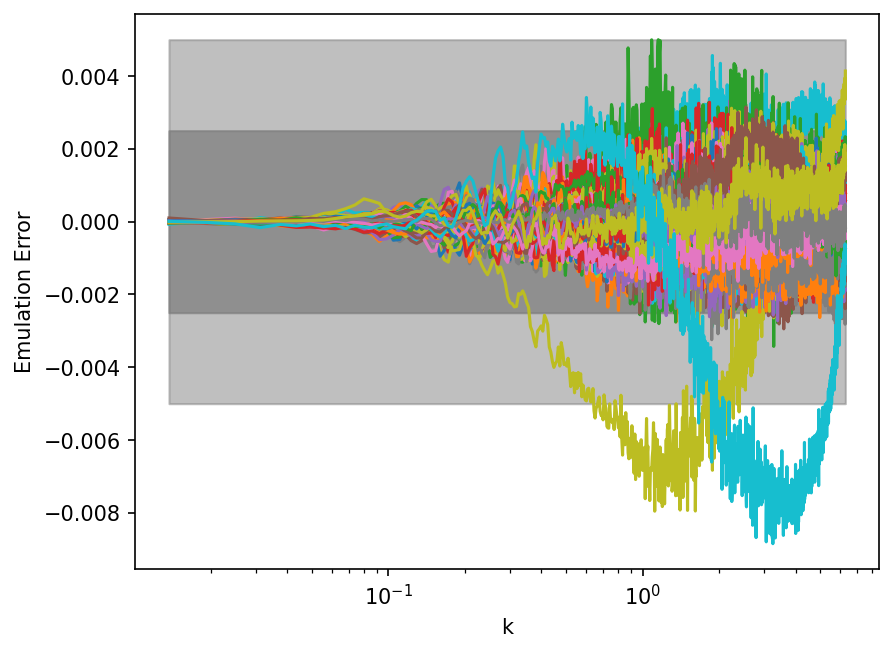

In [33]:
reload(utils)
fig, axs = nn_keras.plot_errors(testSet)
fig.savefig("emu_errors_N1024.pdf")